In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from IPython.display import display
import itertools, time, os, pickle, json, tempfile, sys
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
srcpath = os.path.abspath(os.path.join(os.path.abspath(''),  '..',  'src'))
sys.path.append(srcpath)
from exp_utils import *
#from data_gen_full import *
%load_ext autoreload
%autoreload 2

def append_K_N_diff(df, m ,  key, N_list = np.linspace(2,3000, 15, dtype=int), N_trials = 20 , delta = 0.1):
    high_prob_kerr = []
    for N in N_list:
        high_prob_kerr.append( high_prob_upper( df.loc[N,:]["K_err"], delta ) )
    return high_prob_kerr


 

plt.rcParams.update({
     "text.usetex" : "true",
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


plt.rc('figure', dpi=150)





```(relative, 0.05)``` implies $ R^{emp}(f_{N^*}) \approx 1 - (0.95)Acc(f^*) $ w.h.p


```(margin, 1) ``` implies  $ R^{emp}(f_{N^*}) \approx R_{1}^{emp}(f^*) $ w.h.p

In [2]:


with open('data_full_new.pkl', 'rb') as f:
    data = pickle.load(f)
    data = pd.DataFrame.from_dict(data, orient = 'index')
    data.index = pd.MultiIndex.from_tuples(data.index,  names=['kernel,dataset', 'm_train', 'C'])



In [3]:
#data.loc[:,[120],["optimal"]] ["N_vs_y_pred"][1]
data = data.rename_axis(index = lambda x: x.replace('_', ' ') if type(x)==str else x)
data =  data.rename(columns = lambda x: x.replace('_', ' ') if type(x)==str else x)
margin_err = []
misclass_err = []
N_star_theorem = []
N_star = []
N_list = np.linspace(2,4000, 15, dtype=int)
for x in tqdm(data.index):
    #print(x)
    row = data.loc[x]
    margin_err.append( np.mean(row["y train"]*row["f pred exact"] < 1.0 - 1e-3) )
    misclass_err.append( np.mean(row["y train"]*row["f pred exact"]<0 ) ) 
    if row["N star output"][0] is not None:
        N_star.append(int(row["N star output"][0]))
    else:
        N_star.append(None)
#    print(N_star_K[-1])
   
#    N_star_theorem.append( 2*(row["C val"]**2)*row["m sv"]* np.log(x[1]/0.1) )
data["margin err"] = margin_err
data["misclass"] = misclass_err
data["N star"] = N_star
#data["N star theorem"] = N_star_theorem
data = data.sort_values("misclass")

data

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 768.78it/s]


,,,N star output,f pred exact,y train,C val,m sv,K train,margin err,misclass,N star
"kernel,dataset",m train,C,,,,,,,,,
"(Havliscek, Gen,5)",60,1,"(24, 0.0)","[0.9997912281037566, -0.9998842668700543, 1.00...","[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -...",1,60,"[[1.0, 0.012233239335688506, 0.002097167972381...",0.266667,0.000000,24.0
"(Angle,2, Circles)",40,5,"(None, None)","[0.9950074847979073, 1.0021900065048883, 1.002...","[1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -...",5,32,"[[1.0, 0.7375111056974838, 0.5125782778641892,...",0.200000,0.000000,NaN
"(QAOA, Circles)",120,5,"(203, 0.0)","[-1.5144458558940799, 1.2068916024883243, 1.19...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",5,27,"[[1.0, 0.2105132282289048, 0.25467748412787655...",0.100000,0.000000,203.0
"(Angle,2, Two_Moons)",40,5,"(79, 0.0)","[1.1720850407284975, 0.5876659701224314, 1.000...","[1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -...",5,14,"[[1.0, 0.7947320163463312, 0.6595633677782635,...",0.050000,0.000000,79.0
"(QAOA,2, Checkerboard)",120,1,"(14, 0.0)","[1.1712905438169425, -1.2151097034427851, 1.42...","[1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1,42,"[[1.0, 0.06538774904309058, 0.9376745197428062...",0.183333,0.000000,14.0
...,...,...,...,...,...,...,...,...,...,...,...
"(Angle, Checkerboard)",40,1,"(None, None)","[0.6332275098068438, 0.3825519472731218, 0.637...","[1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1,34,"[[1.0, 0.14186174657731696, 0.9955111606584821...",0.775000,0.400000,NaN
"(Angle,2, Checkerboard)",40,1,"(None, None)","[0.3248676809017802, 0.10136417505061979, 0.42...","[1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1,34,"[[1.0, 0.02012475514196689, 0.991042470995598,...",0.725000,0.400000,NaN
"(Havliscek, Checkerboard)",60,1,"(None, None)","[0.8345792646162309, 0.00445066402597824, 0.99...","[1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1,55,"[[1.0, 0.0036459732061947634, 0.98586482468958...",0.850000,0.416667,NaN


In [6]:
#df = data[data["N star output"][0] > 5]
df = data[data["margin err"] < 0.02]


df = df[["C val", "m sv", "margin err", "N star"  ]]
data_final = df.loc[df["C val"].isin([1,5])].reset_index("m train")#.sort_values(["m sv"])

data_final["val"] = data_final.apply (lambda row: row["m sv"]*(row["C val"]**2), axis=1)
data_final = data_final.loc[data_final["m train"].isin([40])].sort_values(["m sv"])
#sns.scatterplot(data =  data_final,
#x= "m sv", y="N star", s = 30)
#plt.xscale("log")
#plt.yscale("log")

data_final


,,m train,C val,m sv,margin err,N star,val
"kernel,dataset",C,,,,,,
"(QAOA,2, Checkerboard)",5,40,5,17,0.0,70.0,425.0
"(Havliscek,2, Checkerboard)",5,40,5,18,0.0,40.0,450.0
"(Havliscek,2, Two_Moons)",5,40,5,20,0.0,5.0,500.0
"(QAOA,2, Two_Moons)",5,40,5,25,0.0,7.0,625.0
"(Havliscek, Gen,5)",5,40,5,40,0.0,273.0,1000.0


In [5]:
#df = data[data["N star output"][0] > 5]
df = data[data["margin err"] < 0.1]


df = df[["C val", "m sv", "margin err", "N star"  ]]
data_final = df.loc[df["C val"].isin([1,5])].reset_index("m train")#.sort_values(["m sv"])

data_final["val"] = data_final.apply (lambda row: row["m sv"]*(row["C val"]**2), axis=1)
data_final.loc[data_final["m train"].isin([40])].sort_values(["m sv"])


#data_final
#data_final

,,m train,C val,m sv,margin err,N star,val
"kernel,dataset",C,,,,,,
"(QAOA, Two_Moons)",1,120,1,21,0.083333,22.0,21.0
"(Havliscek,2, Two_Moons)",1,120,1,21,0.016667,11.0,21.0
"(QAOA,2, Two_Moons)",1,120,1,30,0.000000,10.0,30.0


In [71]:
df = data[data["margin err"] < 0.1]


df = df[["C val", "m sv", "margin err", "N star"  ]]
data_final["val"] = data_final.apply (lambda row: (row["m sv"])*(row["C val"]**2)*np.log(row["m train"]), axis=1)
#data_final = df.loc[df["C val"].isin([1,5])].reset_index("m train").sort_values(["m sv"])
data_final.sort_values(["N star"])

m train  C val  m sv  margin err  N star  \
kernel,dataset              C                                             
(QAOA,2, Two_Moons)         1       60      1    27    0.016667    20.0   
                            5       60      5    24    0.000000    20.0   
(Havliscek,2, Two_Moons)    5       40      5    20    0.000000    20.0   
                            1       60      1    22    0.033333    24.0   
(QAOA,2, Two_Moons)         5       40      5    25    0.000000    28.0   
(Havliscek,2, Two_Moons)    5       60      5    18    0.000000    36.0   
(QAOA,2, Two_Moons)         1      120      1    30    0.000000    40.0   
                            5      120      5    29    0.000000    40.0   
(Havliscek,2, Two_Moons)    1      120      1    21    0.016667    44.0   
                            5      120      5    22    0.000000    56.0   
(QAOA, Two_Moons)           1      120      1    21    0.083333    88.0   
(Havliscek,2, Checkerboard) 5       40      5    18    0.000000   160.0   
(Havliscek, Gen,2)          5       40      5    10    0.075000   248.0   
(QAOA,2, Checkerboard)      5       60      5    17    0.000000   264.0   
                            5       40      5    17    0.000000   280.0   
(Angle,2, Two_Moons)        5       40      5    14    0.050000   316.0   
(Havliscek,2, Checkerboard) 5       60      5    17    0.000000   328.0   
(QAOA,2, SymDonuts)         5       40      5    22    0.075000   356.0   
(QAOA,2, Checkerboard)      5      120      5    22    0.000000   376.0   
(QAOA,2, Circles)           5       60      5    32    0.000000   396.0   
(Havliscek, Gen,2)          5      120      5    13    0.016667   400.0   
                            5       60      5    12    0.033333   436.0   
(Angle,2, Two_Moons)        5       60      5    12    0.033333   468.0   
(QAOA,2, Circles)           5      120      5    35    0.000000   564.0   
(Havliscek,2, Checkerboard) 5      120      5    25    0.033333   624.0   
(QAOA, Checkerboard)        5      120      5    19    0.050000   644.0   
(Angle,2, Two_Moons)        5      120      5    14    0.016667   812.0   
(Angle,2, Circles)          5      120      5    38    0.000000   908.0   
(Havliscek, Gen,5)          5       40      5    40    0.000000  1092.0   
(QAOA, Two_Moons)           5      120      5    12    0.000000  1376.0   
(Havliscek, Gen,5)          5       60      5    60    0.000000  1936.0   
                            5      120      5   119    0.000000  3748.0   
(QAOA,2, Circles)           5       40      5    34    0.050000     NaN   

                                        val  
kernel,dataset              C                
(QAOA,2, Two_Moons)         1    110.547303  
                            5   2456.606737  
(Havliscek,2, Two_Moons)    5   1844.439727  
                            1     90.075580  
(QAOA,2, Two_Moons)         5   2305.549659  
(Havliscek,2, Two_Moons)    5   1842.455053  
(QAOA,2, Two_Moons)         1    143.624752  
                            5   3470.931514  
(Havliscek,2, Two_Moons)    1    100.537327  
                            5   2633.120459  
(QAOA, Two_Moons)           1    100.537327  
(Havliscek,2, Checkerboard) 5   1659.995754  
(Havliscek, Gen,2)          5    922.219864  
(QAOA,2, Checkerboard)      5   1740.096439  
                            5   1567.773768  
(Angle,2, Two_Moons)        5   1291.107809  
(Havliscek,2, Checkerboard) 5   1740.096439  
(QAOA,2, SymDonuts)         5   2028.883700  
(QAOA,2, Checkerboard)      5   2633.120459  
(QAOA,2, Circles)           5   3275.475650  
(Havliscek, Gen,2)          5   1555.934816  
                            5   1228.303369  
(Angle,2, Two_Moons)        5   1228.303369  
(QAOA,2, Circles)           5   4189.055275  
(Havliscek,2, Checkerboard) 5   2992.182339  
(QAOA, Checkerboard)        5   2274.058578  
(Angle,2, Two_Moons)        5   1675.622110  
(Angle,2, Circles)          5   4548.117156  
(Havliscek, Gen,5)       

In [69]:
#idx_c = [x for x in data.index if x[0][1] == "Checkerboard"]
#data.loc[idx_c]

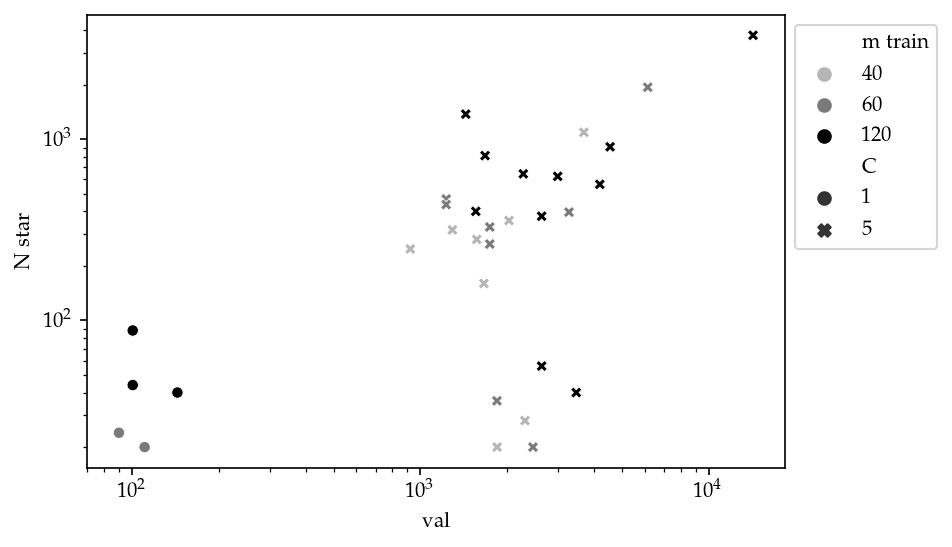

In [72]:
sns.scatterplot(data =  data_final,
x= "val", y="N star", palette="Greys", style = "C", hue = "m train", hue_norm = (0,100), s = 30)
plt.xscale("log")
plt.yscale("log")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [10]:
data.xs(120, level = "m_train")

,,,N_star,emp_risk
"kernel,dataset",Remp_eps,C,,
"(Havliscek, Generated)","(margin, 0.5)",1/sqrt(m),216.000000,0.458333
"(QAOA, Checkerboard)","(margin, 0.5)",5,2.000000,0.583333
"(Circ-Hubr, Two_Moons)","(margin, 0.5)",5,1072.000000,0.200000
"(Havliscek, Checkerboard)","(relative, 0.05)",1/sqrt(m),2.000000,0.501250
"(QAOA, Generated)","(relative, 0.05)",1/sqrt(m),2.000000,0.485417
"(Havliscek, Two_Moons)","(margin, 0.5)",1/sqrt(m),2.000000,0.316667
"(Circ-Hubr, Two_Moons)","(relative, 0.05)",5,2957.000000,0.145000
"(QAOA, Two_Moons)","(margin, 0.5)",5,1072.000000,0.008333
"(Havliscek, Generated)","(relative, 0.05)",1/sqrt(m),2.000000,0.485417
